In [1]:
import pandas as pd
from enum import IntEnum

## Total volume

In [1]:
n_annual_births = 2500

n_hours_per_year = 24 * 365
n_hours_per_year

8760

## Working with dow abbreviations

In [2]:
ts_mon = pd.Timestamp('2022-01-31')
ts_mon

Timestamp('2022-01-31 00:00:00')

In [3]:
ts_mon.weekday()

0

In [4]:
Weekdays = IntEnum('Weekdays', 'mon tue wed thu fri sat sun', start=0)

In [5]:
Weekdays.mon + 1

1

In [6]:
Weekdays['mon'].value

0

In [13]:
dow = 1
start_dow = 3

if dow >= start_dow:
    num_days = dow - start_dow
else:
    num_days = 7 - (start_dow - dow)

print(num_days)

5


## Discrete daily LOS pmfs

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

In [9]:
rng = np.random.default_rng()

In [12]:
rng.choice([1, 2, 3, 4], p=[0.1, 0.6, 0.2, 0.1])

2

## Hourly discharge patterns

In [2]:
prev = 0.7
NP = 10000
nI =  round(NP*prev)
nH = NP-nI

#--- generate the data ---
# Combining data from two different distributions to get a multimodal dataset for which
# using an empirical dist might be quite appropriate
value_h = np.random.beta(2, 9, nH)
value_i = np.random.beta(5, 1, nI)
value_c = np.concatenate((value_h, value_i))

#--- analyse the data, compute the middle of the data classes (bins)---
nBins=30
count_c, bins_c, = np.histogram(value_c, bins=nBins)
myPDF = count_c/np.sum(count_c)
dxc = np.diff(bins_c)[0];   xc = bins_c[0:-1] + 0.5*dxc

In [3]:
nI

7000

In [4]:
value_h

array([0.00992713, 0.18414572, 0.25717416, ..., 0.29778503, 0.06578547,
       0.05421738])

In [5]:
count_c

array([ 140,  280,  373,  392,  357,  335,  278,  248,  176,  135,  114,
         97,  102,   73,   85,  105,  102,  141,  182,  208,  265,  331,
        357,  432,  529,  641,  714,  818,  915, 1075])

In [6]:
bins_c

array([0.00320462, 0.03643057, 0.06965652, 0.10288247, 0.13610843,
       0.16933438, 0.20256033, 0.23578628, 0.26901223, 0.30223818,
       0.33546413, 0.36869009, 0.40191604, 0.43514199, 0.46836794,
       0.50159389, 0.53481984, 0.56804579, 0.60127175, 0.6344977 ,
       0.66772365, 0.7009496 , 0.73417555, 0.7674015 , 0.80062745,
       0.83385341, 0.86707936, 0.90030531, 0.93353126, 0.96675721,
       0.99998316])

In [7]:
myPDF

array([0.014 , 0.028 , 0.0373, 0.0392, 0.0357, 0.0335, 0.0278, 0.0248,
       0.0176, 0.0135, 0.0114, 0.0097, 0.0102, 0.0073, 0.0085, 0.0105,
       0.0102, 0.0141, 0.0182, 0.0208, 0.0265, 0.0331, 0.0357, 0.0432,
       0.0529, 0.0641, 0.0714, 0.0818, 0.0915, 0.1075])

We need the bin width. The np.diff() function return

In [8]:
np.diff(bins_c)

array([0.03322595, 0.03322595, 0.03322595, 0.03322595, 0.03322595,
       0.03322595, 0.03322595, 0.03322595, 0.03322595, 0.03322595,
       0.03322595, 0.03322595, 0.03322595, 0.03322595, 0.03322595,
       0.03322595, 0.03322595, 0.03322595, 0.03322595, 0.03322595,
       0.03322595, 0.03322595, 0.03322595, 0.03322595, 0.03322595,
       0.03322595, 0.03322595, 0.03322595, 0.03322595, 0.03322595])

In [10]:
np.diff(bins_c)[0]

0.03322595138773755

In [11]:
xc

array([0.0198176 , 0.05304355, 0.0862695 , 0.11949545, 0.1527214 ,
       0.18594735, 0.2191733 , 0.25239926, 0.28562521, 0.31885116,
       0.35207711, 0.38530306, 0.41852901, 0.45175496, 0.48498092,
       0.51820687, 0.55143282, 0.58465877, 0.61788472, 0.65111067,
       0.68433662, 0.71756258, 0.75078853, 0.78401448, 0.81724043,
       0.85046638, 0.88369233, 0.91691828, 0.95014424, 0.98337019])

In [12]:
#--- compute the CDF ----
myCDF = np.zeros_like(bins_c)
myCDF

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

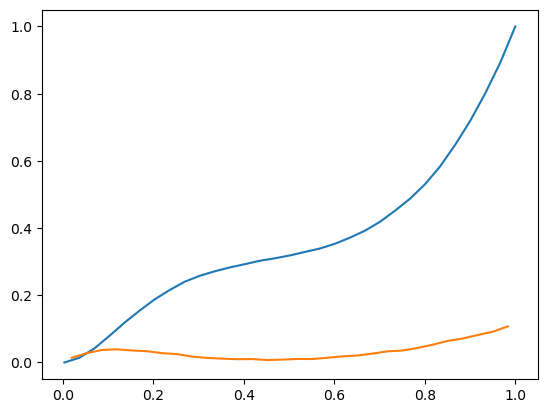

In [16]:
myCDF[1:] = np.cumsum(myPDF)
plt.plot(bins_c, myCDF, xc, myPDF)

In [17]:
discharge_file = '../tests/input/discharge_cdf.txt'

In [29]:
with open(discharge_file, 'r') as f:
    discharge_lines = [line.strip().split() for line in f.readlines() if len(line.strip()) > 0]

In [30]:
discharge_lines

[['1', '0.0'],
 ['2', '0.0'],
 ['3', '0.0'],
 ['4', '0.0'],
 ['5', '0.0'],
 ['6', '0.0'],
 ['7', '0.1'],
 ['8', '0.1'],
 ['9', '0.2'],
 ['10', '0.3'],
 ['11', '0.5'],
 ['12', '0.6'],
 ['13', '0.7'],
 ['14', '0.8'],
 ['15', '0.9'],
 ['16', '1.0'],
 ['17', '1.0'],
 ['18', '1.0'],
 ['19', '1.0'],
 ['20', '1.0'],
 ['21', '1.0'],
 ['22', '1.0'],
 ['23', '1.0'],
 ['24', '1.0']]

In [31]:
list(zip(*discharge_lines))

[('1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24'),
 ('0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.1',
  '0.1',
  '0.2',
  '0.3',
  '0.5',
  '0.6',
  '0.7',
  '0.8',
  '0.9',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0')]

In [43]:
bins = np.array([int(x) for x in list(zip(*discharge_lines))[0]])
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [42]:
cdf = np.array([float(x) for x in list(zip(*discharge_lines))[1]])
cdf

array([0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7,
       0.8, 0.9, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ])

In [35]:
rng = np.random.default_rng()
a = rng.random()
a

0.009547557797477402

In [44]:
(cdf >= a)

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [45]:
np.argmax(cdf >= a)

6

In [47]:
bins[np.argmax(cdf >= a) - 1]

6